In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
books = pd.read_csv("clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [9]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [13]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [17]:
books.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,350.0,4.608571,0.226941,3.3,4.5,4.6,4.8,4.9
year,350.0,2013.508571,3.284711,2009.0,2010.0,2013.0,2016.0,2019.0


<function matplotlib.pyplot.show(close=None, block=None)>

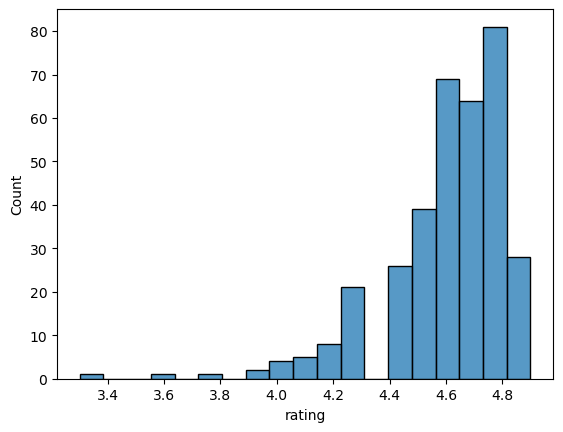

In [19]:
sns.histplot(data = books, x = "rating")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

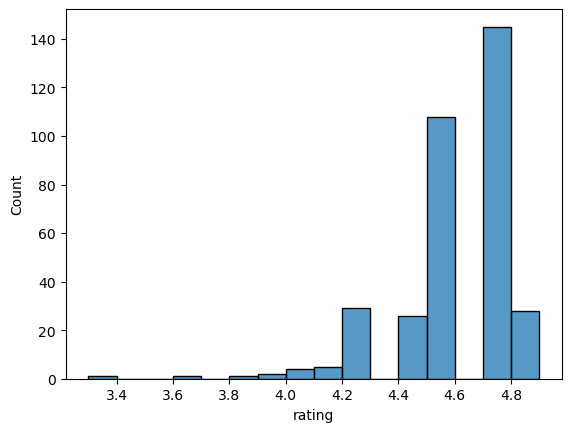

In [37]:
sns.histplot(data = books, x = "rating", binwidth = .1)
plt.show

In [39]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [43]:
books["year"] = books["year"].astype(float)
books.dtypes

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object

In [45]:
books.dtypes

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object

In [47]:
books["year"] = books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

In [55]:
books["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [57]:
~books["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [75]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [77]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [79]:
books["year"].min()

2009

In [81]:
books["year"].max()

2019

<function matplotlib.pyplot.show(close=None, block=None)>

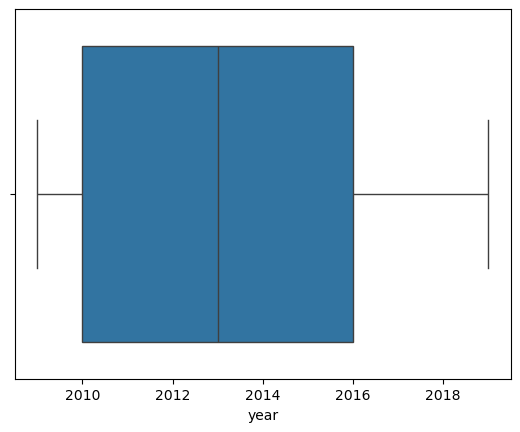

In [83]:
sns.boxplot(data = books, x = "year")
plt.show

<Axes: xlabel='year', ylabel='genre'>

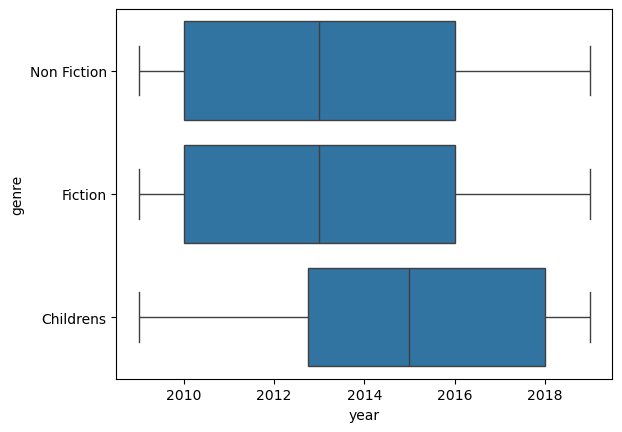

In [87]:
sns.boxplot(data = books, x = "year", y = "genre")

In [99]:
books[["genre", "rating", "year"]].groupby("genre").sum()

,rating,year
genre,,
Childrens,191.2,80603
Fiction,598.7,263706
Non Fiction,823.1,360419


In [101]:
books[["genre", "rating", "year"]].groupby("genre").count()

,rating,year
genre,,
Childrens,40,40
Fiction,131,131
Non Fiction,179,179


In [103]:
books[["genre", "rating", "year"]].groupby("genre").min()

,rating,year
genre,,
Childrens,4.4,2009
Fiction,3.3,2009
Non Fiction,4.0,2009


In [105]:
books[["genre", "rating", "year"]].groupby("genre").max()

,rating,year
genre,,
Childrens,4.9,2019
Fiction,4.9,2019
Non Fiction,4.9,2019


In [107]:
books[["genre", "rating", "year"]].groupby("genre").var()

,rating,year
genre,,
Childrens,0.014974,10.891667
Fiction,0.079030,9.545625
Non Fiction,0.032188,11.071433


In [109]:
books[["genre", "rating", "year"]].groupby("genre").std()

,rating,year
genre,,
Childrens,0.122370,3.300253
Fiction,0.281123,3.089600
Non Fiction,0.179411,3.327376


In [111]:
books[["rating", "year"]].agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [113]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [115]:
books.groupby("genre").agg(
    mean_rating = ("rating", "mean"),
    std_rating = ("rating", "std"),
    median_year = ("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


<function matplotlib.pyplot.show(close=None, block=None)>

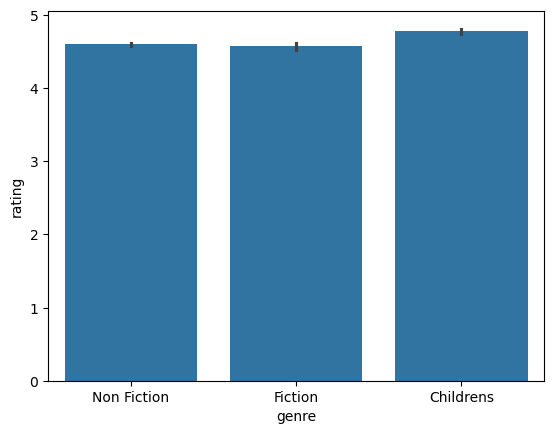

In [117]:
sns.barplot(data = books, x = "genre", y = "rating")
plt.show